In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from collections import Counter, defaultdict


from sklearn import preprocessing
# from sklearn import manifold
from sklearn.cluster import KMeans, Birch, DBSCAN



from sklearn import metrics

from scipy.stats import sem, t
from scipy import mean

from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('daily data.csv')
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,pollen_intensity,admission number,risk level
0,2019-01-01,16.0,7.6,11.5,16.0,6.6,11.4,5.1,66.2,0.000,...,1031.6,1.2,10.1,117.2,10.3,5,Clear,good,5,high risk
1,2019-01-02,15.9,7.6,10.9,15.9,6.2,10.5,7.4,80.2,0.000,...,1029.9,3.5,9.1,57.6,4.8,3,Clear,good,3,moderate risk
2,2019-01-03,10.3,4.5,7.4,10.3,2.2,6.3,6.1,91.7,0.005,...,1027.3,5.5,4.3,116.9,10.2,5,Rain,good,1,low risk
3,2019-01-04,13.1,6.6,9.7,13.1,4.1,8.7,6.9,84.1,0.000,...,1029.9,13.1,6.5,101.0,8.8,5,Clear,good,5,high risk
4,2019-01-05,14.8,7.8,10.5,14.8,6.0,9.9,5.5,71.4,0.000,...,1033.3,0.4,9.9,128.6,11.1,5,Clear,good,2,moderate risk


In [3]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'pollen_intensity', 'admission number', 'risk level'],
      dtype='object')

In [4]:
df.isna().sum()

datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
windgust            256
windspeed             0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
conditions            0
pollen_intensity      0
admission number      0
risk level            0
dtype: int64

## dropping unwanted columns

In [5]:
toDrop = ['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase', 'windgust']

In [6]:
for col in df:
    if col  in toDrop:
        df.drop(col, axis=1, inplace=True)

## Encode categorical columns into numbers

In [39]:
# conditions
# pollen_intensity

# Get one hot encoding of columns conditions
one_hot = pd.get_dummies(df['conditions'])
# Drop column conditions as it is now encoded
df = df.drop('conditions',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,pollen_intensity,admission number,risk level,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
0,2019-01-01,16.0,7.6,11.5,16.0,6.6,11.4,5.1,66.2,0.000,...,10.3,5.0,good,5.0,high risk,1,0,0,0,0
1,2019-01-02,15.9,7.6,10.9,15.9,6.2,10.5,7.4,80.2,0.000,...,4.8,3.0,good,3.0,moderate risk,1,0,0,0,0
2,2019-01-03,10.3,4.5,7.4,10.3,2.2,6.3,6.1,91.7,0.005,...,10.2,5.0,good,1.0,low risk,0,0,1,0,0
3,2019-01-04,13.1,6.6,9.7,13.1,4.1,8.7,6.9,84.1,0.000,...,8.8,5.0,good,5.0,high risk,1,0,0,0,0
4,2019-01-05,14.8,7.8,10.5,14.8,6.0,9.9,5.5,71.4,0.000,...,11.1,5.0,good,2.0,moderate risk,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2020-03-27,17.9,10.1,13.3,17.9,10.1,13.3,7.0,67.0,0.000,...,21.0,8.0,good,0.0,low risk,0,1,0,0,0
452,2020-03-28,17.2,9.9,13.5,17.2,7.9,13.4,5.9,60.9,0.000,...,21.5,9.0,good,1.0,low risk,0,1,0,0,0
453,2020-03-29,18.4,11.0,14.4,18.4,11.0,14.4,9.6,73.6,0.000,...,19.4,8.0,good,0.0,low risk,0,1,0,0,0
454,2020-03-30,13.5,9.1,12.3,13.5,5.5,12.2,10.8,90.7,8.742,...,5.7,3.0,good,1.0,low risk,0,0,0,0,1


In [40]:
df['pollen_intensity'].value_counts()

good              351
muito elevados     56
elevados           28
baixos             21
Name: pollen_intensity, dtype: int64

In [42]:
for i in range(len(df['pollen_intensity'])):
    if df.loc[i, 'pollen_intensity'] == 'good':
        df.loc[i, 'pollen_intensity'] = 1
    elif df.loc[i, 'pollen_intensity'] == 'baixos':
        df.loc[i, 'pollen_intensity'] = 2
    elif df.loc[i, 'pollen_intensity'] == 'elevados':
        df.loc[i, 'pollen_intensity'] = 3
    elif df.loc[i, 'pollen_intensity'] == 'muito elevados':
        df.loc[i, 'pollen_intensity'] = 4
df['pollen_intensity'].value_counts()

1    351
4     56
3     28
2     21
Name: pollen_intensity, dtype: int64

In [43]:
X = pd.DataFrame()
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
        X[col] = df[col]
    except:
        print(col)
X

datetime
risk level


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,solarradiation,solarenergy,uvindex,pollen_intensity,admission number,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
0,16.0,7.6,11.5,16.0,6.6,11.4,5.1,66.2,0.000,0.0,...,117.2,10.3,5.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0
1,15.9,7.6,10.9,15.9,6.2,10.5,7.4,80.2,0.000,0.0,...,57.6,4.8,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0
2,10.3,4.5,7.4,10.3,2.2,6.3,6.1,91.7,0.005,100.0,...,116.9,10.2,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,13.1,6.6,9.7,13.1,4.1,8.7,6.9,84.1,0.000,0.0,...,101.0,8.8,5.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0
4,14.8,7.8,10.5,14.8,6.0,9.9,5.5,71.4,0.000,0.0,...,128.6,11.1,5.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,17.9,10.1,13.3,17.9,10.1,13.3,7.0,67.0,0.000,0.0,...,245.8,21.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
452,17.2,9.9,13.5,17.2,7.9,13.4,5.9,60.9,0.000,0.0,...,247.5,21.5,9.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
453,18.4,11.0,14.4,18.4,11.0,14.4,9.6,73.6,0.000,0.0,...,232.4,19.4,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
454,13.5,9.1,12.3,13.5,5.5,12.2,10.8,90.7,8.742,100.0,...,67.0,5.7,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# high risk
# moderate risk
# low risk

In [57]:
y = [1 if risk=='low risk' else 2 if risk=='moderate risk' else 3 for risk in df['risk level']]
Counter(y)
# y = []
# for risk in df['risk level']:

Counter({3: 111, 2: 183, 1: 162})

In [58]:
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])

In [59]:
########## PCA of visualization
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

In [60]:

#### kmeans algorithm
### Choosing best Num cluster for KMeans
for NumbOfcluster in range(2, 10):
    kmean = KMeans(n_clusters=NumbOfcluster)
    kmean.fit(X)
    labels = kmean.labels_
    KMeans_Sil = metrics.silhouette_score(X, kmean.labels_, metric='euclidean')
    print('Kmeans silhouette ',KMeans_Sil)

Kmeans silhouette  0.4574545881192403
Kmeans silhouette  0.4561510349171522
Kmeans silhouette  0.46249403098835445
Kmeans silhouette  0.4474202852476948
Kmeans silhouette  0.43571669628380333
Kmeans silhouette  0.4166678775183662
Kmeans silhouette  0.4055341392506005
Kmeans silhouette  0.3754915362987775


In [61]:

#### kmeans algorithm
# start = time.time()
kmean = KMeans(n_clusters=3, max_iter=200)
kmean.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)

KMeans(max_iter=200, n_clusters=3)

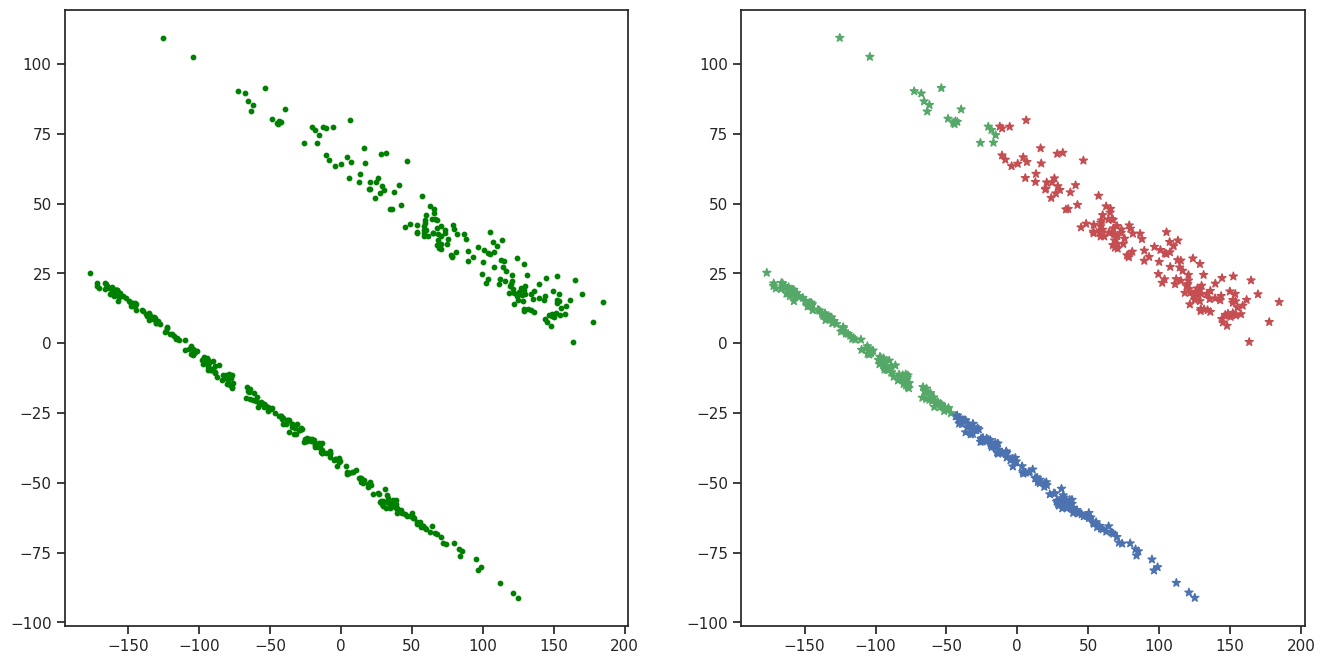

In [62]:

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')

In [63]:

#### Birch algorithm
### Choosing best Num cluster for Birch
for NumbOfcluster in range(2, 10):
    birch = Birch(n_clusters=NumbOfcluster)
    birch.fit(X)
    labels = birch.labels_
    
    birch_Sil = metrics.silhouette_score(X, birch.labels_, metric='euclidean')
    print('Birch silhouette ',KMeans_Sil)

Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775
Birch silhouette  0.3754915362987775


In [65]:

#### kmeans algorithm
# start = time.time()
birch = Birch(n_clusters=3)
birch.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)

Birch()

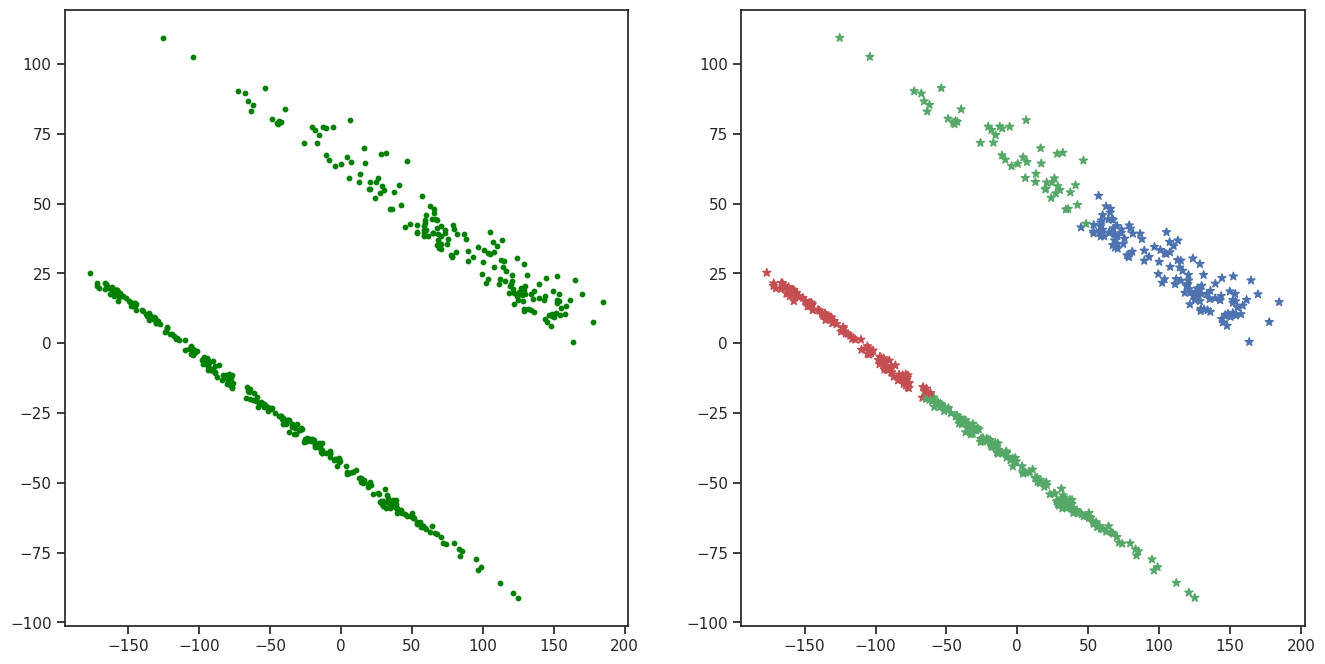

In [66]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[birch.labels_], marker='*')

In [67]:

#### kmeans algorithm
# start = time.time()
dbscan = DBSCAN(eps=40, min_samples=5)
dbscan.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)
Counter(dbscan.labels_)

Counter({0: 279, 1: 175, -1: 2})

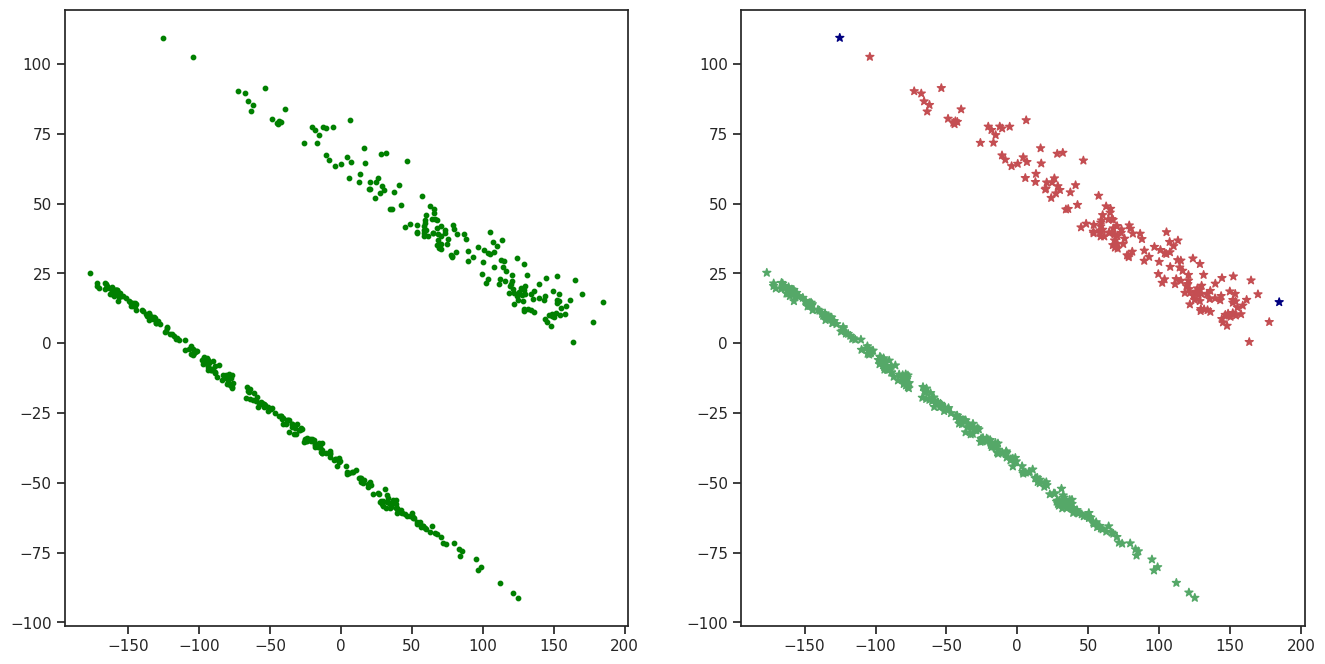

In [68]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[dbscan.labels_], marker='*')

In [69]:
X['Kmeans label'] = kmean.labels_
X['birch'] = birch.labels_
X['dbscan'] = dbscan.labels_
X['risk level'] = y 
X

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,admission number,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Kmeans label,birch,dbscan,risk level
0,16.0,7.6,11.5,16.0,6.6,11.4,5.1,66.2,0.000,0.0,...,5.0,1.0,0.0,0.0,0.0,0.0,2,0,0,3
1,15.9,7.6,10.9,15.9,6.2,10.5,7.4,80.2,0.000,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,2,0,0,2
2,10.3,4.5,7.4,10.3,2.2,6.3,6.1,91.7,0.005,100.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1,2,1,1
3,13.1,6.6,9.7,13.1,4.1,8.7,6.9,84.1,0.000,0.0,...,5.0,1.0,0.0,0.0,0.0,0.0,2,0,0,3
4,14.8,7.8,10.5,14.8,6.0,9.9,5.5,71.4,0.000,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,17.9,10.1,13.3,17.9,10.1,13.3,7.0,67.0,0.000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1
452,17.2,9.9,13.5,17.2,7.9,13.4,5.9,60.9,0.000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1
453,18.4,11.0,14.4,18.4,11.0,14.4,9.6,73.6,0.000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1
454,13.5,9.1,12.3,13.5,5.5,12.2,10.8,90.7,8.742,100.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,2,1,1


In [70]:
X.to_csv('result.csv', index=False)

In [73]:
# X[['Kmeans label', 'birch', 'dbscan', 'risk level']].corr()

,Kmeans label,birch,dbscan,risk level
Kmeans label,1.000000,-0.341824,-0.055898,0.134756
birch,-0.341824,1.000000,0.559723,0.018407
dbscan,-0.055898,0.559723,1.000000,0.054185
risk level,0.134756,0.018407,0.054185,1.000000


In [89]:
X['risk level'].value_counts()

2    183
1    162
3    111
Name: risk level, dtype: int64

In [79]:
X[X['Kmeans label']==0]['risk level'].value_counts()

1    70
2    59
3    29
Name: risk level, dtype: int64

In [80]:
X[X['Kmeans label']==1]['risk level'].value_counts()

1    56
2    55
3    47
Name: risk level, dtype: int64

In [81]:
X[X['Kmeans label']==2]['risk level'].value_counts()

2    69
1    36
3    35
Name: risk level, dtype: int64

In [83]:
X[X['birch']==0]['risk level'].value_counts()

2    97
1    64
3    50
Name: risk level, dtype: int64

In [84]:
X[X['birch']==1]['risk level'].value_counts()

1    57
2    44
3    19
Name: risk level, dtype: int64

In [85]:
X[X['birch']==2]['risk level'].value_counts()

3    42
2    42
1    41
Name: risk level, dtype: int64

In [86]:
X[X['dbscan']==0]['risk level'].value_counts()

2    122
1     98
3     59
Name: risk level, dtype: int64

In [87]:
X[X['dbscan']==1]['risk level'].value_counts()

1    63
2    60
3    52
Name: risk level, dtype: int64

In [88]:
X[X['dbscan']==-1]['risk level'].value_counts()

1    1
2    1
Name: risk level, dtype: int64